# Image Compression

In [1]:
import numpy as np
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from image_comression import *

# Encoder

# Forward transform

Separating image into 8x8 blocks

In [2]:
image_array = cv2.resize(cv2.imread("Pattern.jpg",0), (640, 640))
blocks = get_blocks(image_array)

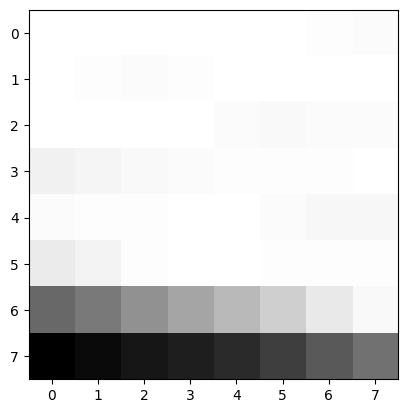

In [3]:
#Displying a single block
plt.imshow(blocks[0],cmap="gray")

# Applying DCT to all the blocks separately

In [4]:
dct_blocks = get_dct_blocks(blocks)

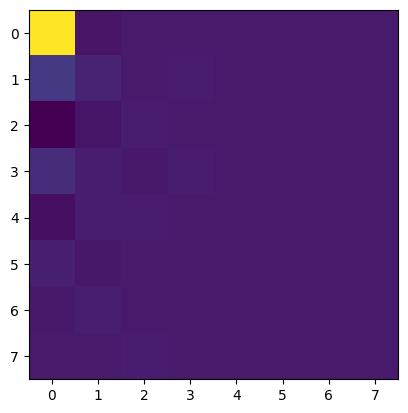

In [5]:
#Displying a single DCT applied block (DCT app;ied to the above block)
plt.imshow(dct_blocks[0])

# Quntizing all the blocks into three levels

In [6]:
high_quntized_blocks = quantize_blocks(dct_blocks,"high")
mid_quntized_blocks = quantize_blocks(dct_blocks,"mid")
low_quntized_blocks = quantize_blocks(dct_blocks,"low")

In [7]:
print(low_quntized_blocks.shape)

(6400, 8, 8)


Text(0.5, 1.0, 'Low Quality')

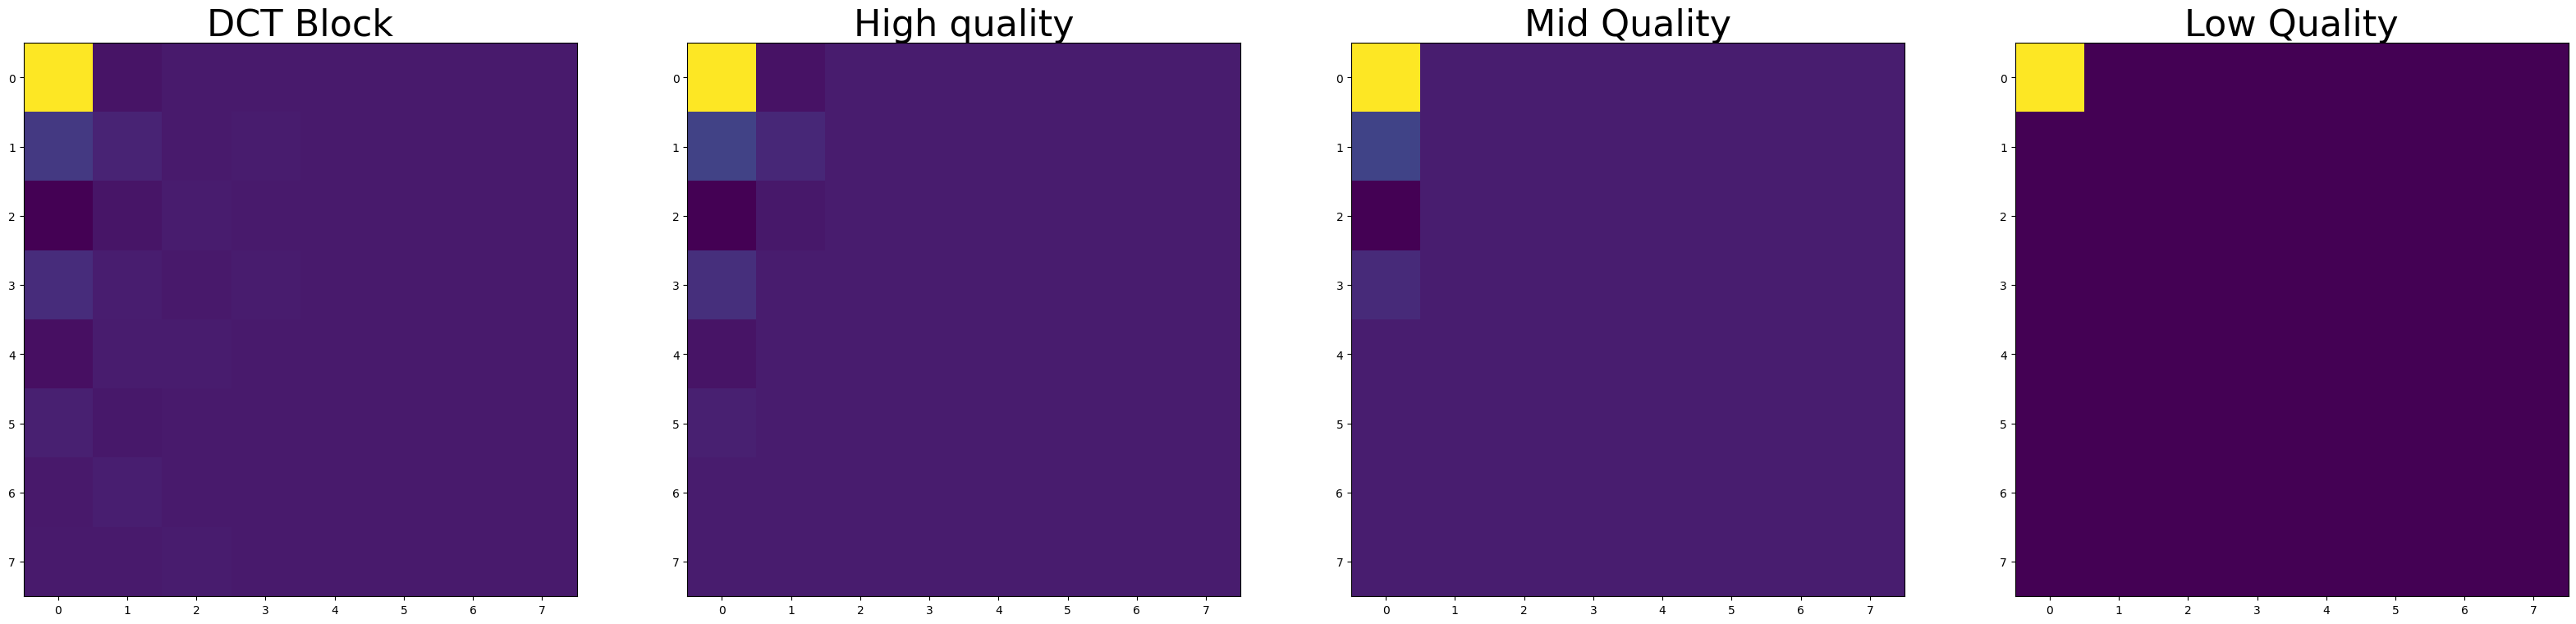

In [8]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(40, 24))  # Adjust figsize as needed
ax1.imshow(dct_blocks[0])
ax1.set_title('DCT Block', fontsize=32)
ax2.imshow(high_quntized_blocks[0])
ax2.set_title('High quality', fontsize=32)
ax3.imshow(mid_quntized_blocks[0])
ax3.set_title('Mid Quality', fontsize=32)
ax4.imshow(low_quntized_blocks[0])
ax4.set_title('Low Quality', fontsize=32)

# Run length coding the quantized blocks

In [9]:
result_string_high = compress_run_length_blocks(high_quntized_blocks,"run_length_high.txt")
result_string_mid = compress_run_length_blocks(mid_quntized_blocks,"run_length_mid.txt")
result_string_low = compress_run_length_blocks(low_quntized_blocks,"run_length_low.txt")

Calculate compression ratios

In [10]:
compressed_file_size_high = (len(result_string_high)/8000)
compressed_file_size_mid = (len(result_string_mid)/8000)
compressed_file_size_low = (len(result_string_low)/8000)

previos_file_size = (640*640*8)/8000

compression_ratio_high = previos_file_size/compressed_file_size_high
compression_ratio_mid = previos_file_size/compressed_file_size_mid
compression_ratio_low = previos_file_size/compressed_file_size_low

print(f"Previous file size - {previos_file_size} kb")
print(f"Compressed file size high- {compressed_file_size_high} kb")
print(f"Compressed file size mid- {compressed_file_size_mid} kb")
print(f"Compressed file size low- {compressed_file_size_low} kb")
print(f"Compression Ratio high- {compression_ratio_high}")
print(f"Compression Ratio mid- {compression_ratio_mid}")
print(f"Compression Ratio low- {compression_ratio_low}")

Previous file size - 409.6 kb
Compressed file size high- 163.4505 kb
Compressed file size mid- 76.438 kb
Compressed file size low- 34.893125 kb
Compression Ratio high- 2.505957461127375
Compression Ratio mid- 5.358591276590178
Compression Ratio low- 11.738702108223325


# Decompression of the compressed images (Decoder)

In [11]:
result_blocks_high = decompress_run_length_blocks("run_length_high.txt")
result_blocks_mid = decompress_run_length_blocks("run_length_mid.txt")
result_blocks_low = decompress_run_length_blocks("run_length_low.txt")

# Dequantization of the decompressed macro blocks

In [12]:
dequntized_blocks_high = dequntize_blocks(result_blocks_high,"high")
dequntized_blocks_mid = dequntize_blocks(result_blocks_mid,"mid")
dequntized_blocks_low = dequntize_blocks(result_blocks_low,"low")

# Reconstruct the images from obtained macro blocks

In [13]:
reconstructed_high = reconstruct_from_blocks(dequntized_blocks_high)
reconstructed_mid = reconstruct_from_blocks(dequntized_blocks_mid)
reconstructed_low = reconstruct_from_blocks(dequntized_blocks_low)

Calculating PSNR values of three levels with respect to the original image

In [14]:
PSNR_high = calculate_psnr(image_array,reconstructed_high)
PSNR_mid = calculate_psnr(image_array,reconstructed_mid)
PSNR_low = calculate_psnr(image_array,reconstructed_low)

print(f"PSNR high - {PSNR_high}")
print(f"PSNR mid - {PSNR_mid}")
print(f"PSNR low - {PSNR_low}")

PSNR high - 30.51604209335972
PSNR mid - 23.488820027558983
PSNR low - 16.49935933258878


# Displying the original and compressed images

Text(0.5, 1.0, 'Low quality')

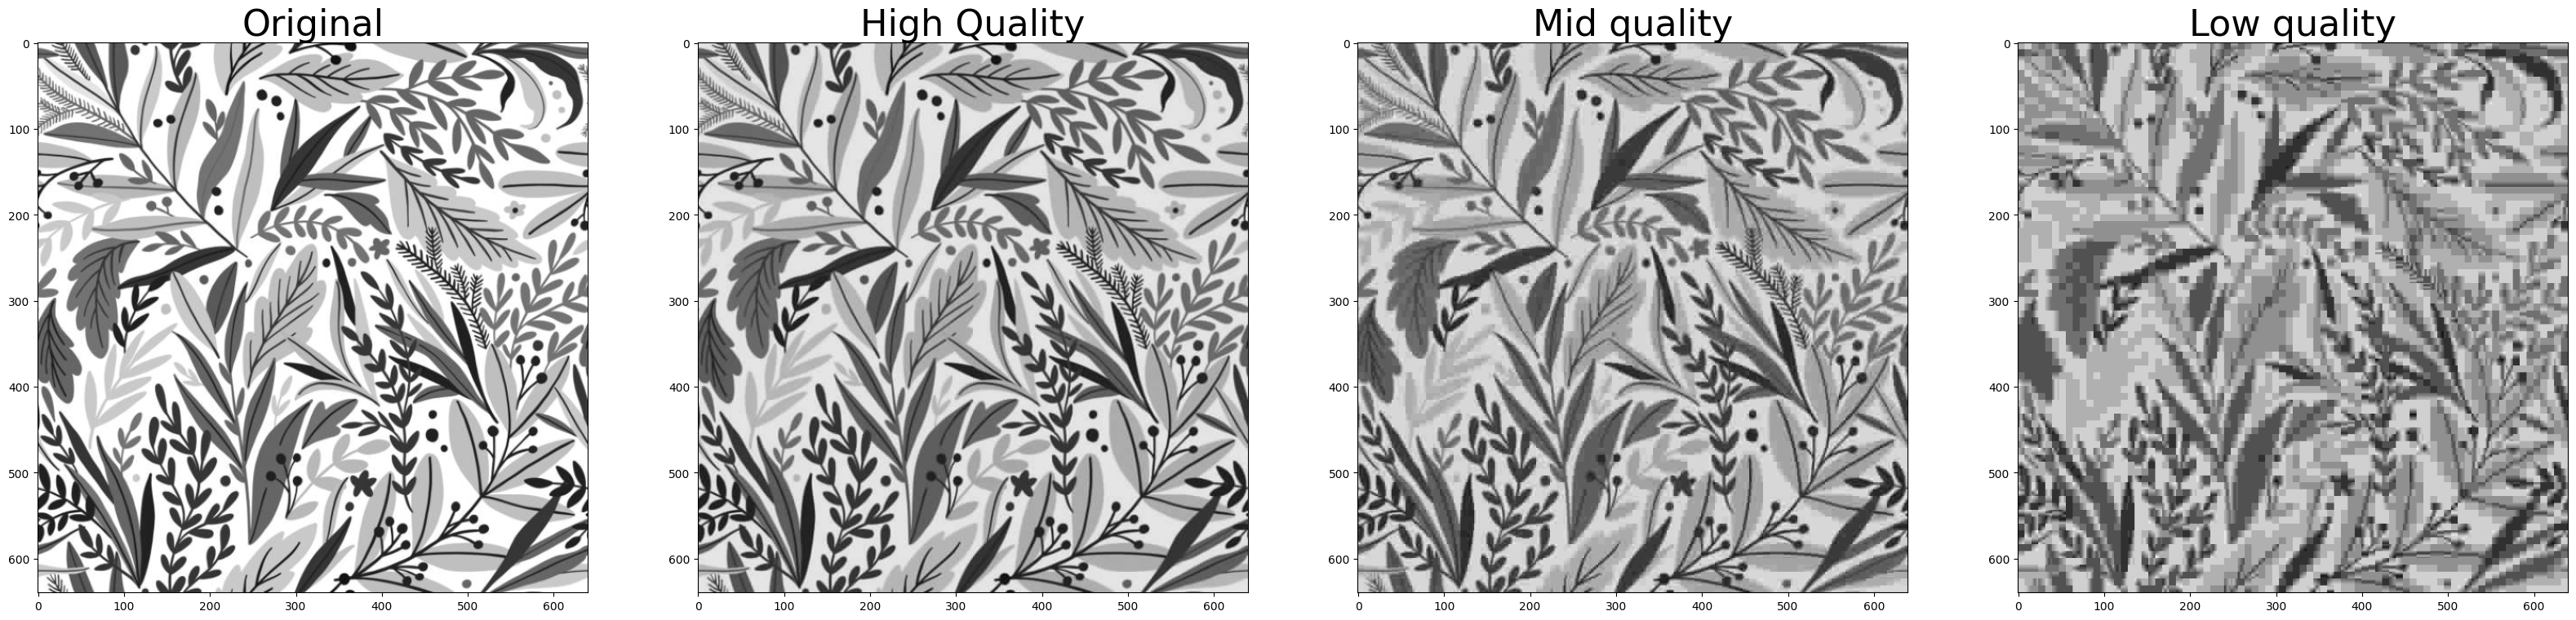

In [15]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(40, 24))  # Adjust figsize as needed
ax1.imshow(image_array, cmap="gray")
ax1.set_title('Original', fontsize=32)
ax2.imshow(reconstructed_high, cmap="gray")
ax2.set_title('High Quality', fontsize=32)
ax3.imshow(reconstructed_mid, cmap="gray")
ax3.set_title('Mid quality', fontsize=32)
ax4.imshow(reconstructed_low, cmap="gray")
ax4.set_title('Low quality', fontsize=32)

In [21]:
plt.imsave("image_compression_results/Original.png",image_array, cmap="gray")
plt.imsave("image_compression_results/High_quality_compressed.png",reconstructed_high, cmap="gray")
plt.imsave("image_compression_results/Mid_quality_compressed.png",reconstructed_mid, cmap="gray")
plt.imsave("image_compression_results/Low_quality_compressed.png",reconstructed_low, cmap="gray")

# Adjusting the quility for a required bit rate

Trial and error

In [16]:
quntized_blocks = quantize_blocks_custom(dct_blocks,0.141)
result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
compressed_file_size_custom = (len(result_string_custom)/8000)
previos_file_size = (640*640*8)/8000

print(f"Previous file size - {previos_file_size} kb")
print(f"Compressed file size custom- {compressed_file_size_custom} kb")
#required size = 341 kb >> scaler 0.14

Previous file size - 409.6 kb
Compressed file size custom- 340.69175 kb


Itterative method to find the ideal scalar

In [17]:
required_rate = 341
current_scaler = 0.5
alpha = 0.005

scalers  = []
bitrates = []

quntized_blocks = quantize_blocks_custom(dct_blocks,current_scaler)
result_string_custom = compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
current_rate = (len(result_string_custom)/8000)
print(current_rate)

while True:
    if current_rate < required_rate:
        current_scaler = current_scaler - alpha
        quntized_blocks = quantize_blocks_custom(dct_blocks,current_scaler)
        result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
        current_rate = (len(result_string_custom)/8000)
        print(current_rate)
        scalers.append(current_scaler)
        bitrates.append(current_rate)
        if current_rate > required_rate:
            break
    
    if current_rate > required_rate:
        current_scaler = current_scaler + alpha
        quntized_blocks = quantize_blocks_custom(dct_blocks,current_scaler)
        result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
        current_rate = (len(result_string_custom)/8000)
        print(current_rate)
        scalers.append(current_scaler)
        bitrates.append(current_rate)
        if current_rate < required_rate:
            break

213.5685
214.339125
215.300875
216.094875
216.941125
217.862875
218.68825
219.53025
220.44125
221.3945
222.248875
223.103125
223.98525
224.95575
225.880375
226.96525
227.98
228.99225
230.08725
231.196625
232.286
233.446375
234.6855
235.801875
236.994
238.1875
239.351
240.7325
241.90875
243.16025
244.216875
245.634
246.979875
248.35375
249.722125
251.36625
252.748875
254.47025
255.929125
257.514375
259.126
260.82525
262.5485
264.118375
265.895
267.68925
269.483125
271.19975
273.232125
275.10575
277.264875
279.124625
281.309375
283.521125
285.821
288.334
290.68475
293.20475
295.848875
298.648125
301.27575
304.0225
307.166875
310.067125
313.044
315.884125
319.25825
322.36025
325.934375
329.85475
333.771875
337.660375
341.61025


In [18]:
scalers = np.array(scalers)
bitrates = np.array(bitrates)

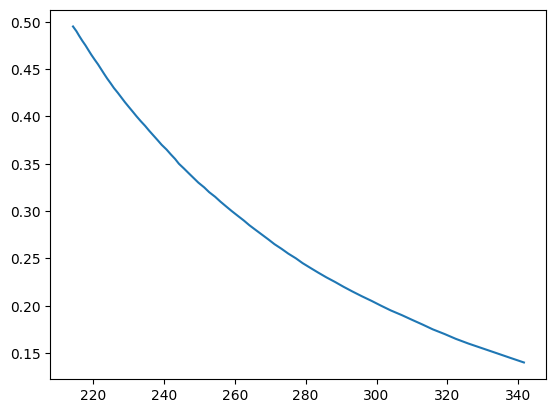

In [19]:
plt.plot(bitrates,scalers)

In [18]:
string = compress_complete_image(image_array,1,"test_string.txt")
print(len(string))

1307604


In [35]:
import math
required_rate = 350
current_scaler = 0.5

result_string_custom = compress_complete_image(image_array,current_scaler,"test_string.txt")
current_rate = (len(result_string_custom)/8000)
initial_learning_rate = 0.05
alpha = initial_learning_rate
decay_rate = 0.005
step = 0
print(current_rate,alpha)
#optimize alpha to the difference between current rate and the required rate, If
while True:
    if current_rate < required_rate:
        current_scaler = current_scaler - alpha
        alpha = alpha / math.sqrt(1 + decay_rate * abs(current_rate-required_rate))
        result_string_custom = compress_complete_image(image_array,current_scaler,"test_string.txt")
        current_rate = (len(result_string_custom)/8000)
        step = step + 1
        print(current_rate,alpha)
        if current_rate > required_rate:
            break
    
    if current_rate > required_rate:
        current_scaler = current_scaler + alpha
        alpha = alpha / math.sqrt(1 + decay_rate * abs(current_rate-required_rate))
        result_string_custom = compress_complete_image(image_array,current_scaler,"test_string.txt")
        current_rate = (len(result_string_custom)/8000)
        step = step + 1
        print(current_rate,alpha)
        if current_rate < required_rate:
            break

213.5685 0.05
222.248875 0.038551091272367506
229.81625 0.03011477193376874
236.626375 0.02380098512653898
242.445375 0.019014228562053877
247.441125 0.015333192101238596
251.8705 0.012466445026203515
255.676875 0.01021069134363696
258.978625 0.008417012129868742
261.75675 0.006977671293785867


KeyboardInterrupt: 